In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [47]:
apple_training_complete = pd.read_csv(r'AAPL_train.csv')


In [48]:
apple_training_processed = apple_training_complete.iloc[:, 1:2].values


In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

apple_training_scaled = scaler.fit_transform(apple_training_processed)


In [50]:
features_set = []
labels = []
for i in range(60, 1258):
    features_set.append(apple_training_scaled[i-60:i, 0])
    labels.append(apple_training_scaled[i, 0])


In [51]:
print(apple_training_complete)

            Date       High        Low       Open      Close       Volume  \
0     2012-01-03  14.732143  14.607143  14.621429  14.686786  302220800.0   
1     2012-01-04  14.810000  14.617143  14.642857  14.765714  260022000.0   
2     2012-01-05  14.948214  14.738214  14.819643  14.929643  271269600.0   
3     2012-01-06  15.098214  14.972143  14.991786  15.085714  318292800.0   
4     2012-01-09  15.276786  15.048214  15.196429  15.061786  394024400.0   
...          ...        ...        ...        ...        ...          ...   
1253  2016-12-23  29.129999  28.897499  28.897499  29.129999   56998000.0   
1254  2016-12-27  29.450001  29.122499  29.129999  29.315001   73187600.0   
1255  2016-12-28  29.504999  29.049999  29.379999  29.190001   83623600.0   
1256  2016-12-29  29.277500  29.100000  29.112499  29.182501   60158000.0   
1257  2016-12-30  29.299999  28.857500  29.162500  28.955000  122345200.0   

      Adj Close  
0     12.557466  
1     12.624948  
2     12.765115  
3  

In [52]:
print(apple_training_processed)

[[14.7321434 ]
 [14.81000042]
 [14.94821358]
 ...
 [29.50499916]
 [29.27750015]
 [29.29999924]]


In [53]:
features_set, labels = np.array(features_set), np.array(labels)


In [54]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))


In [55]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [56]:
model = Sequential()

In [57]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))


In [58]:
model.add(Dropout(0.2))


In [59]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))


In [60]:
model.add(Dense(units = 1))


In [61]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [62]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)


Epoch 1/100
38/38 [==============================] - 12s 81ms/step - loss: 0.0399
Epoch 2/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0085
Epoch 3/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0076
Epoch 4/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0066
Epoch 5/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0064
Epoch 6/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0059
Epoch 7/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0056
Epoch 8/100
38/38 [==============================] - 3s 90ms/step - loss: 0.0053
Epoch 9/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0064
Epoch 10/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0054
Epoch 11/100
38/38 [==============================] - 3s 74ms/step - loss: 0.0054
Epoch 12/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0046
Epoch 13/100
38/38 [====

38/38 [==============================] - 2s 59ms/step - loss: 0.0015


In [77]:
apple_testing_complete = pd.read_csv(r'aapl_test.csv')
apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values


In [78]:
apple_total = pd.concat((apple_training_complete['Open'], apple_testing_complete['Open']), axis=0)


In [79]:
test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values


In [80]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)


In [81]:
test_features = []
for i in range(60, 80):
    test_features.append(test_inputs[i-60:i, 0])


In [82]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))


In [83]:
predictions = model.predict(test_features)

1/1 [==============================] - 0s 32ms/step


In [84]:
predictions = scaler.inverse_transform(predictions)



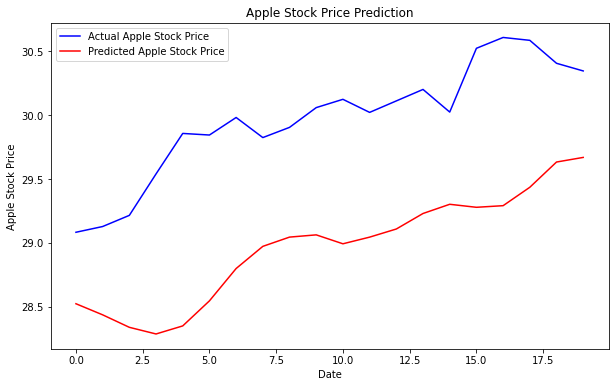

In [85]:
plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()


In [88]:
print(len(predictions))

20


In [89]:
print(len(apple_testing_processed))

20
